In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests

## Exercise 1:

In [12]:
import datetime as dt
from pandas_datareader import data

Write a program to calculate the percentage price change over 2019 for the following shares:

In [16]:
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

In [17]:
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)

In [22]:
first_day_p = ticker.iloc[0]
last_day_p = ticker.iloc[-1] 
pct_change = (last_day_p - first_day_p) / first_day_p * 100
pct_change

INTC    27.124036
MSFT    55.953316
IBM     16.344062
BHP     14.312575
TM      20.863429
AAPL    85.948580
AMZN    20.057432
BA       0.602209
QCOM    53.710803
KO      17.941611
GOOG    27.840517
SNE     39.573067
PTR    -17.369887
dtype: float64

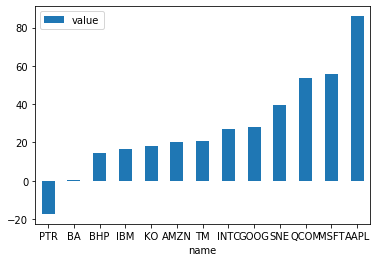

In [39]:
my_ticker = pd.DataFrame({'name': pct_change.index, 'value': pct_change})
my_ticker.sort_values(by = 'value', inplace=True)
ax = my_ticker.plot.bar(x='name', y='value', rot=0)


## Exercise 2:

Following the work you did in Exercise 1, you can query the data using read_data by updating the start and end dates accordingly.

In [47]:
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}

In [48]:
indices_data = read_data(
        indices_list,
        start=dt.datetime(1928, 1, 2),
        end=dt.datetime(2020, 12, 31)
)

In [54]:
indices_data

,^GSPC,^IXIC,^DJI,^N225
Date,,,,
1928-01-03,17.760000,NaN,NaN,NaN
1928-01-04,17.719999,NaN,NaN,NaN
1928-01-05,17.549999,NaN,NaN,NaN
1928-01-06,17.660000,NaN,NaN,NaN
1928-01-09,17.500000,NaN,NaN,NaN
...,...,...,...,...
2020-07-22,3276.020020,10706.129883,27005.839844,22751.609375
2020-07-23,3235.659912,10461.419922,26652.330078,NaN
2020-07-24,3215.629883,10363.179688,26469.890625,NaN


In [69]:
yearly_returns = {}
for index in indices_list:
    name = indices_list[index]
    selected_df = indices_data.groupby(indices_data.index.year)[index]
    
    first_day_p = selected_df.first()
    last_day_p = selected_df.last()
    pct_change = (last_day_p - first_day_p) / first_day_p * 100

    yearly_returns[name] = pct_change
    
yearly_returns = pd.DataFrame(yearly_returns)

In [70]:
yearly_returns.describe()

,S&P 500,NASDAQ,Dow Jones,Nikkei
count,93.000000,50.000000,36.000000,56.000000
mean,7.463200,12.350305,9.249821,7.671154
std,18.792843,24.468708,14.248233,24.149544
min,-48.769718,-40.197764,-32.716831,-39.676977
25%,-6.033627,-1.211722,0.420493,-8.068010
50%,9.898764,14.216289,8.895627,7.545539
75%,19.671602,26.714530,21.648257,21.058165
max,45.973651,84.294285,33.311106,92.011231


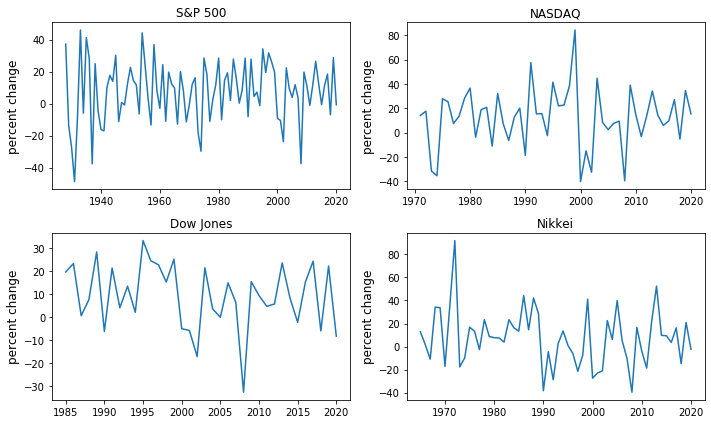

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

for column_i, ax in enumerate(axes.flatten()):            # Flatten 2-D array to 1-D array
    index_name = yearly_returns.columns[column_i]         # Get index name per iteration
    ax.plot(yearly_returns[index_name])                # Plot pct change of yearly returns per index
    ax.set_ylabel("percent change", fontsize = 12)
    ax.set_title(index_name)

plt.tight_layout()